# <font color='blue'> Predições de Vendas das Lojas ROSSMANN </font>

# Agenda

1. Contexto
2. Desafio
4. Desenvolvimento da Solução
5. Conclusão & Demonstração
6. Próximos Passos

# <font color='blue'> 1. Contexto </font>

- Reunião Mensal de Resultados
- CFO pediu uma Previsão de Vendas das Próximas 6 semanas de cada Loja

# <font color='blue'> 2. Desafio </font>

# Problema
- Definição do Budget para a Reforma das Lojas.

# Causas
- Predição de Vendas Atual apresentada muita Divergencia
- O processo de Predição de Vendas é baseado em Experiencias Passadas.
- Todo a Previsão de Vendas é feita Manualmente pelas 1.115 Lojas da Rossmann.
- A visualização das Vendas é Limitada ao Computador.

# Solução
- Usar Machine Learning para realizar a Previsão de Vendas de Todas as Lojas
- Visualização das Predições de Vendas poderão ser feitas pelo Smartphone

# <font color='blue'> 3. Desenvolvimento da Solução </font>

# DESCRICAO DOS DADOS

# Dimenção dos Dados

In [7]:
print( 'Number of Rows: {}'.format( df1.shape[0] ) )
print( 'Number of cols: {}'.format( df1.shape[1] ) )

Number of Rows: 1017209
Number of cols: 18


# Estátistica Descritiva Dos DADOS

In [17]:
# concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


# Mapa Mental de Hipoteses

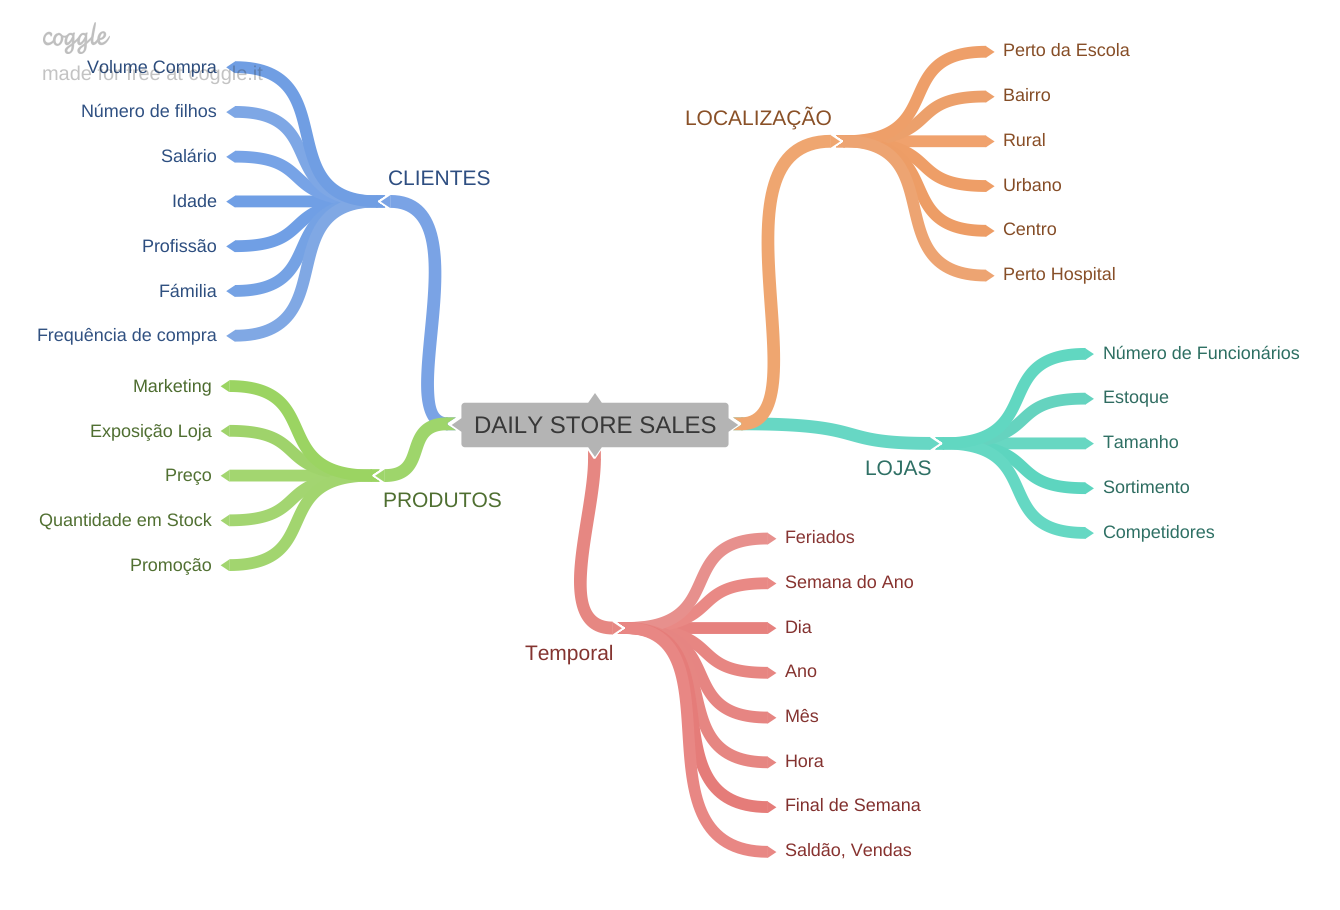

In [21]:
Image( 'img/mindmaphypothesis.png' )

## Hipoteses Da Análise Exploratória

**1.** Lojas com maior sortimentos deveriam vender mais.

**2.** Lojas com competidores mais próximos deveriam vender menos.

**3.** Lojas com competidores à mais tempo deveriam vendem mais.

**4.** Lojas com promoção ativas por mais tempo deveriam vender mais. 

**5.** Lojas com mais dias de promoção deveriam vender mais. 

**6.** Lojas com mais promoção consecutivas deveriam vender mais. 

**7.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**8.** Lojas deveriam vender mais ao longo dos anos.

**9.** Lojas deveriam vender mais no segundo semestre do ano.

**10.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**11.** Lojas deveriam vender menos aos finais de semana.

**12.** Lojas deveriam vender menos durante os feriados escolares.



#  Análise Exploratória Dados

# Variável Resposta

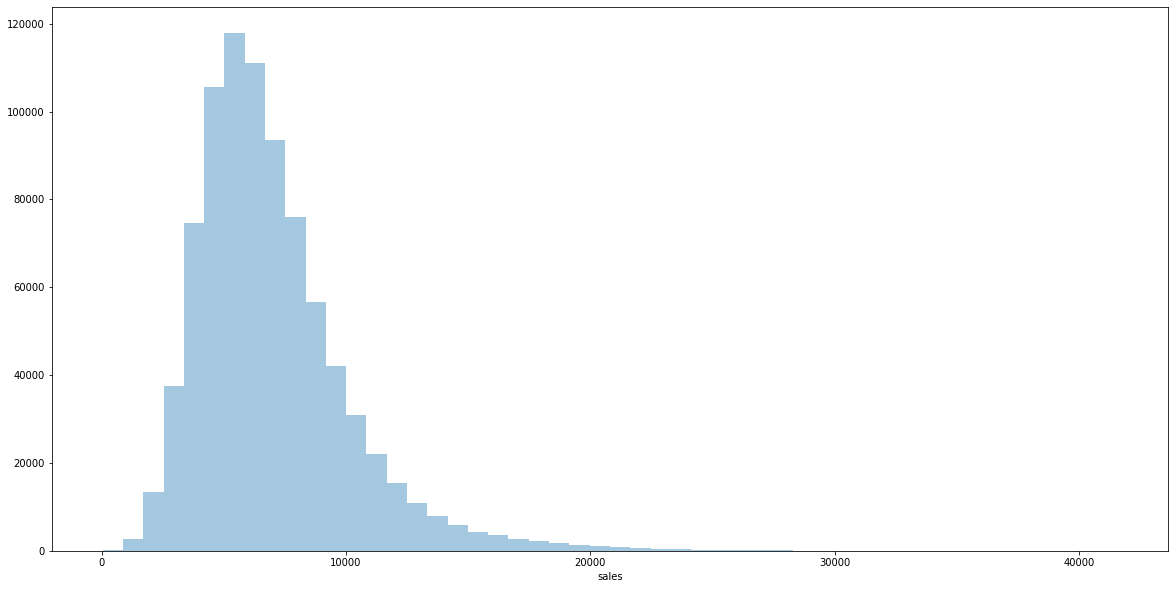

In [30]:
sns.distplot( (df4['sales'] ), kde = False).figure.set_size_inches(20,10)

# Variável Numérica

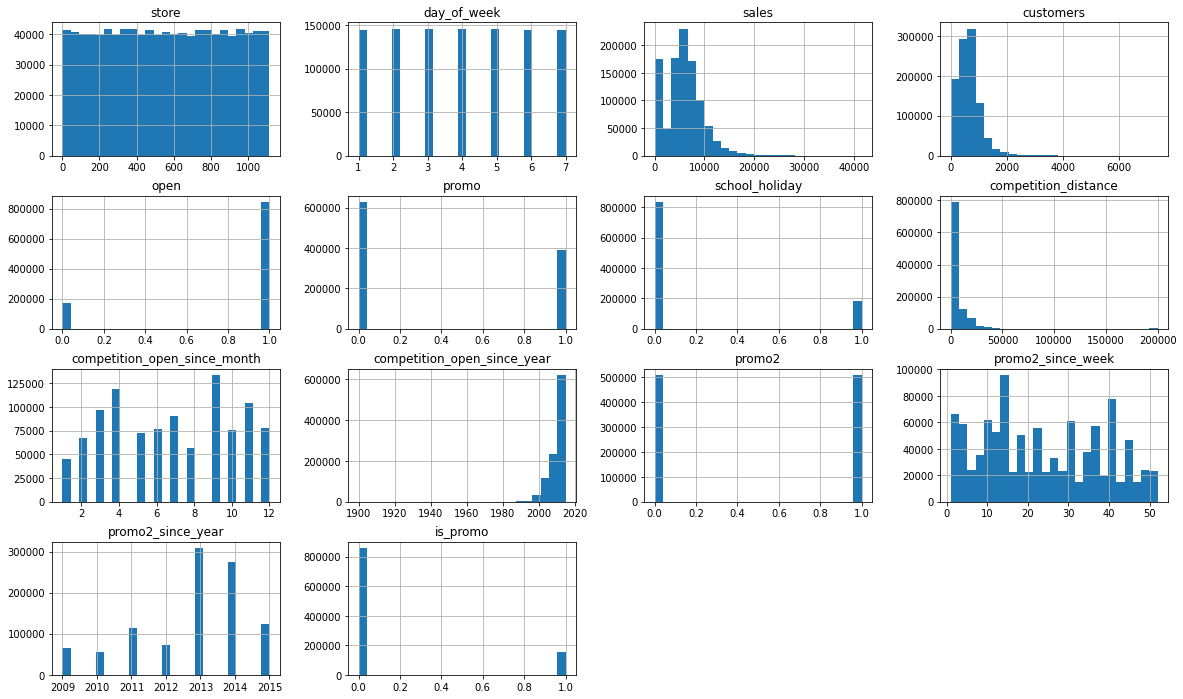

In [31]:
num_attributes.hist(bins = 25, figsize=(20,12));

# Variável Categórica

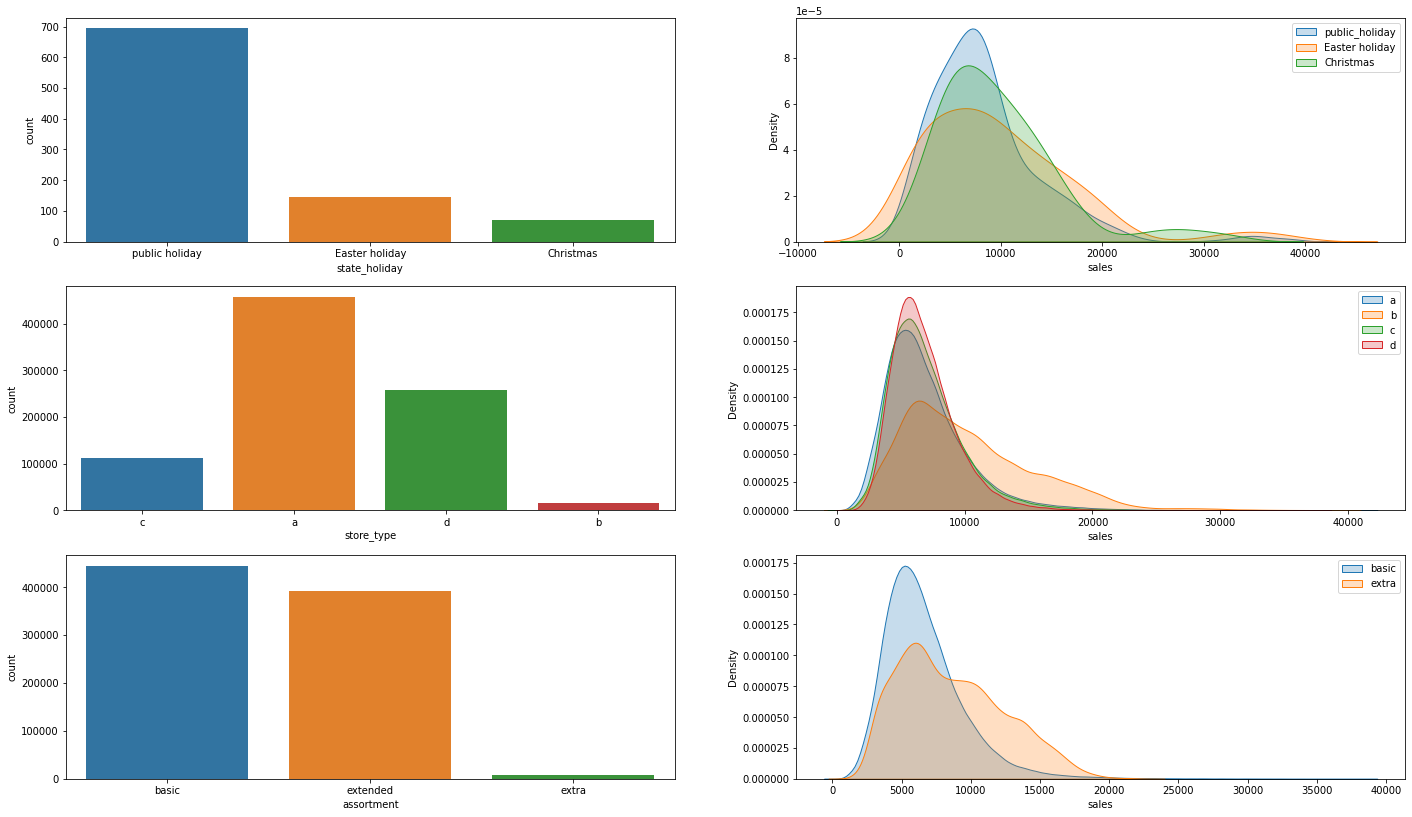

In [35]:
# state_holiday
plt.subplot( 3, 2, 1)
a = df4[df4['state_holiday'] != 'regular_day']
sns.countplot( a['state_holiday'] ).figure.set_size_inches(15,8);

plt.subplot( 3, 2, 2)
sns.kdeplot( df4[df4['state_holiday']== 'public holiday']['sales'],  label='public_holiday', shade=True )
sns.kdeplot( df4[df4['state_holiday']== 'Easter holiday']['sales'], label='Easter holiday', shade=True )
sns.kdeplot( df4[df4['state_holiday']== 'Christmas']['sales'],  label='Christmas', shade=True )
plt.legend()

# store_type
plt.subplot( 3, 2, 3)
sns.countplot( df4['store_type'] ).figure.set_size_inches(18,8);

plt.subplot( 3, 2, 4)
sns.kdeplot( df4[df4['store_type']== 'a']['sales'],  label='a', shade=True )
sns.kdeplot( df4[df4['store_type']== 'b']['sales'], label='b', shade=True )
sns.kdeplot( df4[df4['store_type']== 'c']['sales'],  label='c', shade=True )
sns.kdeplot( df4[df4['store_type']== 'd']['sales'],  label='d', shade=True )
plt.legend()


# assortment
plt.subplot( 3, 2, 5)
sns.countplot( df4['assortment'] ).figure.set_size_inches(24,14);

plt.subplot( 3, 2, 6)
sns.kdeplot( df4[df4['assortment']== 'basic']['sales'],  label='basic', shade=True )
sns.kdeplot( df4[df4['assortment']== 'extend']['sales'], label='extend', shade=True )
sns.kdeplot( df4[df4['assortment']== 'extra']['sales'],  label='extra', shade=True )
plt.legend();

#  Validação das Hipóteses

### **H1.** Lojas com maior sortimentos deveriam vender mais.
**FALSA** Lojas com maior MAIOR SORTIMENTO vendem MENOS


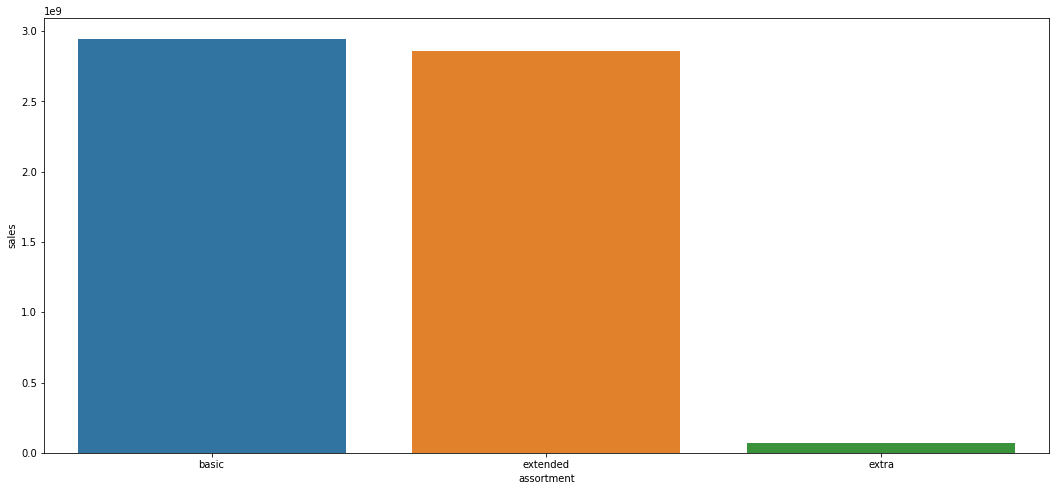

In [36]:
aux1 = df4[['assortment','sales']].groupby('assortment').sum().reset_index()
sns.barplot( x='assortment', y = 'sales', data = aux1).figure.set_size_inches(18,8);

### **H1.** Lojas com maior sortimentos deveriam vender mais.
**FALSA** Lojas com maior MAIOR SORTIMENTO vendem MENOS


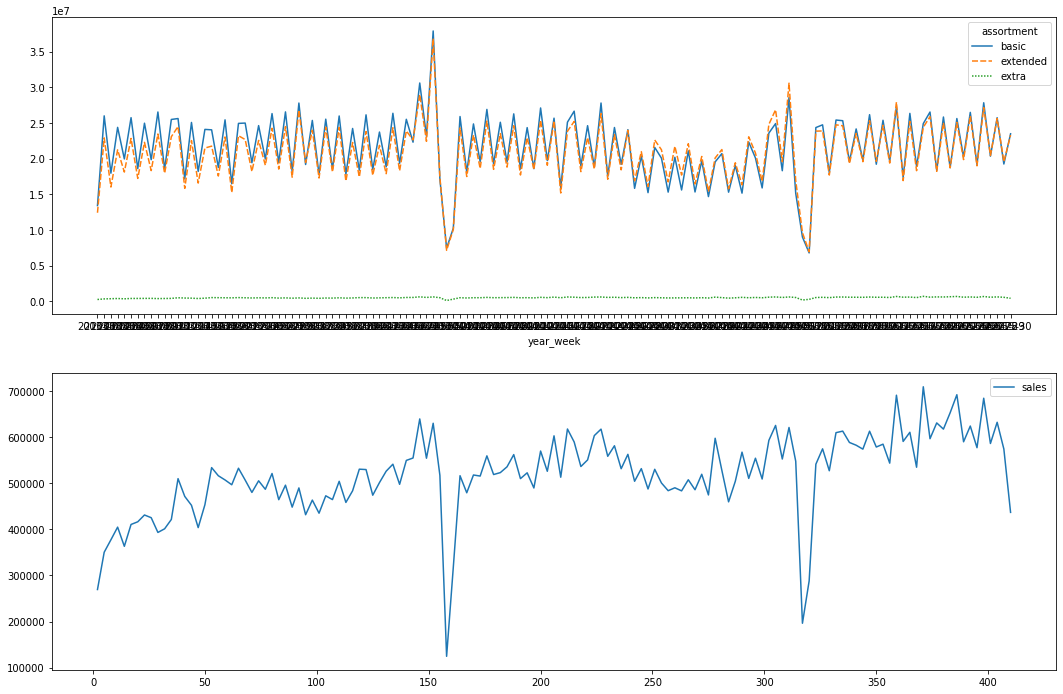

In [38]:
#plot assortment year_week:

aux2 = df4[['year_week', 'assortment','sales']].groupby( ['year_week','assortment'] ).sum().reset_index()
plot_aux2 = aux2.pivot( index= 'year_week', columns='assortment', values = 'sales')
plt.subplot( 2, 1, 1)
sns.lineplot( data=plot_aux2  ).figure.set_size_inches(18,12);


#Plot assortment extra year_week:
aux3 = aux2[aux2['assortment'] == 'extra']
plt.subplot( 2, 1, 2)
sns.lineplot( data=aux3  ).figure.set_size_inches(18,12);


### **H2.** Lojas com competidores mais próximos deveriam vender menos.
**FALSA** Lojas com COMPETIDORES MAIS PRÓXIMOS vendem MAIS


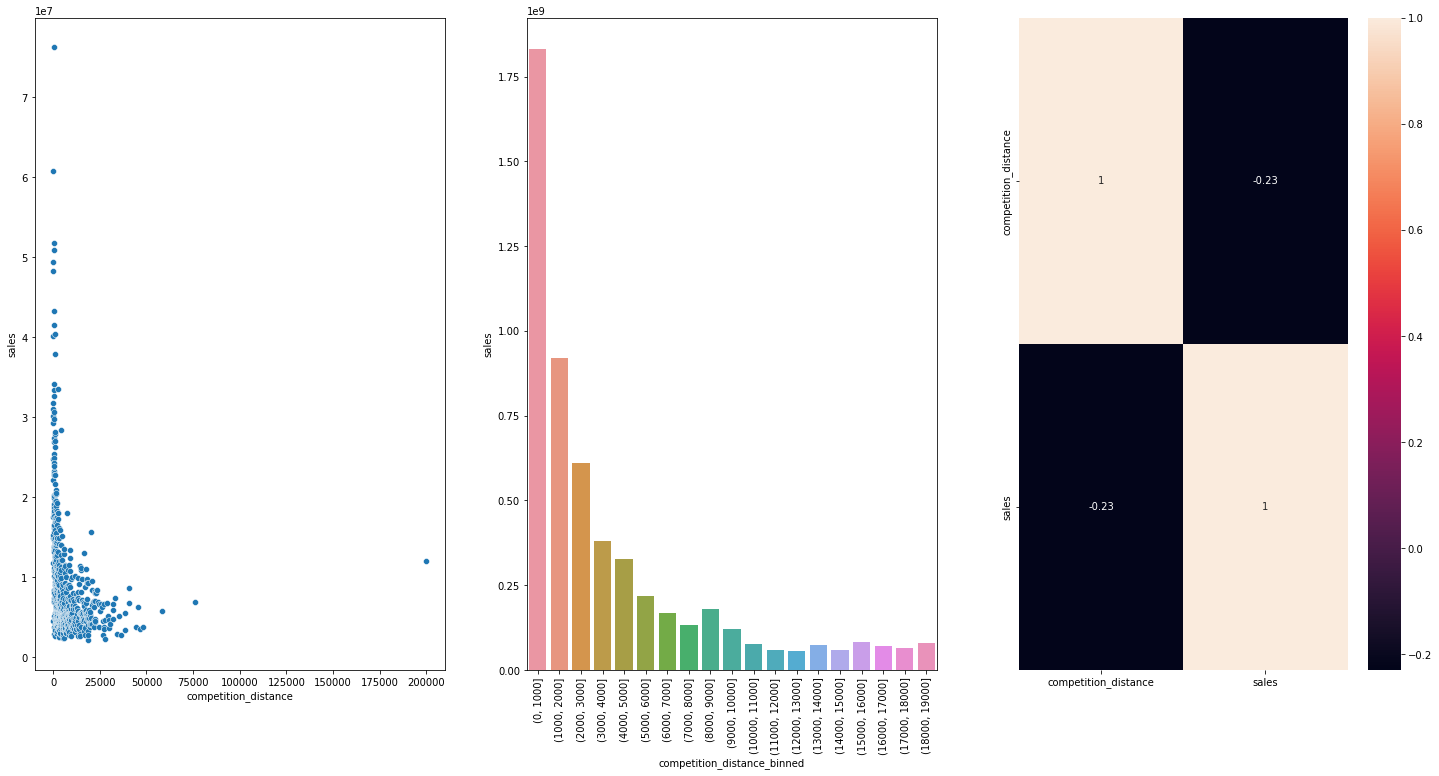

In [44]:
aux1 = df4[['competition_distance', 'sales']].groupby( 'competition_distance' ).sum().reset_index()

plt.subplot( 1, 3, 1).figure.set_size_inches(25,12)
sns.scatterplot( x = 'competition_distance', y = 'sales', data = aux1 );

bins = list( np.arange( 0, 20000, 1000)  )

aux1[ 'competition_distance_binned' ] = pd.cut( aux1['competition_distance'], bins = bins )
aux2 = aux1[['competition_distance_binned', 'sales']].groupby( 'competition_distance_binned' ).sum().reset_index()
plt.subplot( 1, 3, 2)
sns.barplot( x='competition_distance_binned', y='sales', data=aux2 );
plt.xticks( rotation = 90 );

plt.subplot( 1, 3, 3 )
sns.heatmap( aux1.corr( method='pearson' ), annot = True);

### **H7.** Lojas abertas durante o feriado de Natal deveriam vender mais.
**FALSA** Lojas abertas durante o feriado do Natal vendm menos. 

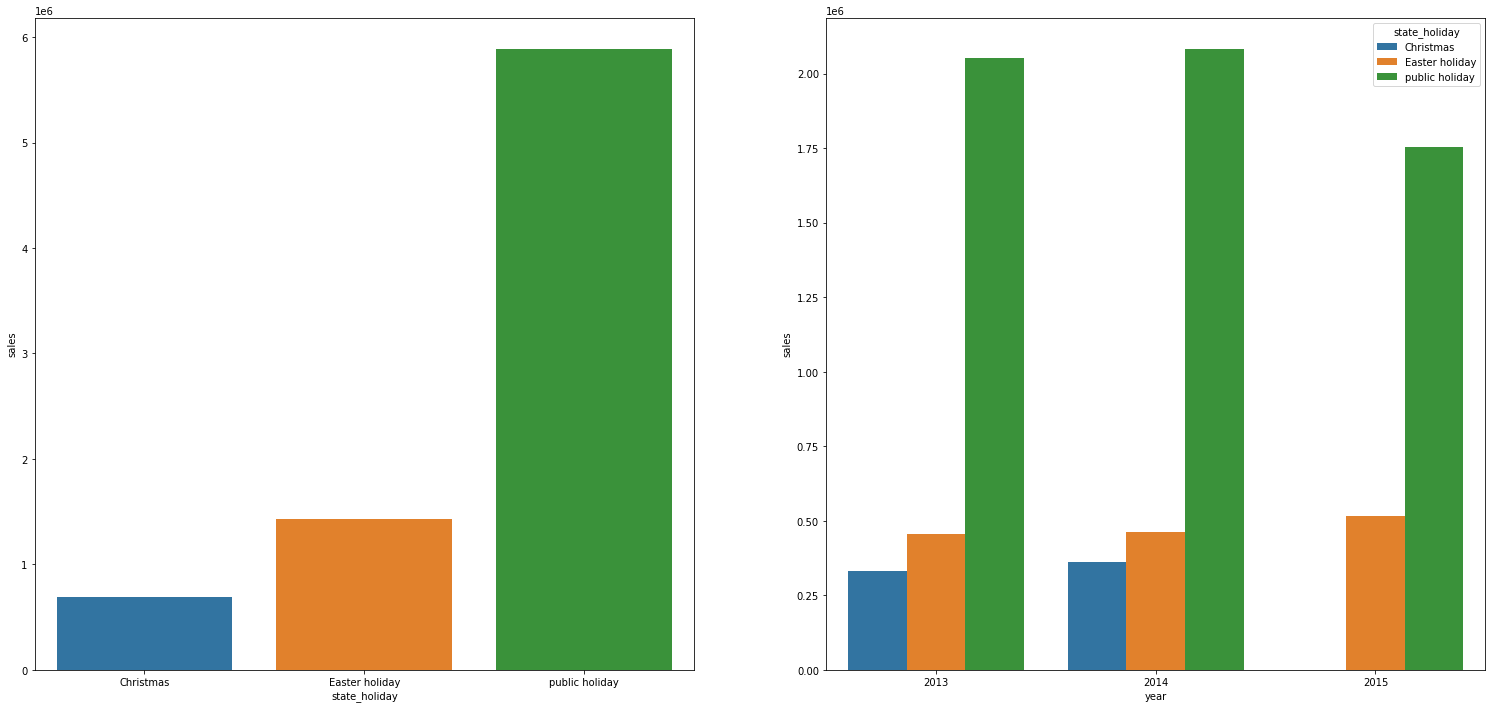

In [49]:
aux = df4[df4['state_holiday'] != 'regular_day']
aux1 = aux[['state_holiday', 'sales']].groupby( 'state_holiday' ).sum().reset_index()
plt.subplot( 1, 2, 1).figure.set_size_inches(26,12);
sns.barplot( x = 'state_holiday', y = 'sales', data = aux1 );

aux2 = aux[['year', 'state_holiday', 'sales', ]].groupby( ['year', 'state_holiday'] ).sum().reset_index()
plt.subplot( 1, 2, 2);
sns.barplot( x = 'year', y = 'sales', hue='state_holiday', data = aux2 );

### **10.** Lojas deveriam vender mais depois do dia 10 de cada mês.
**VERDADEIRA** Lojas vendem mais depois do dia 10 de cada mês.

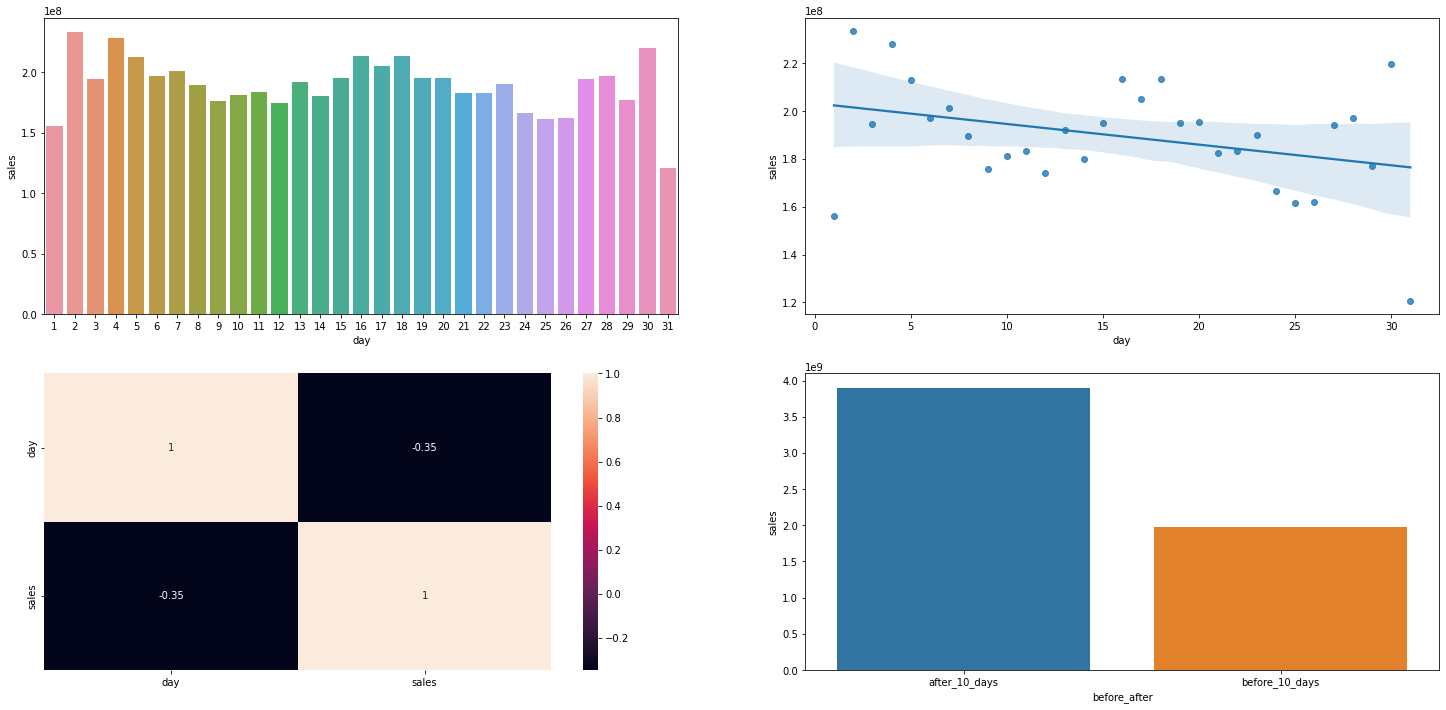

In [52]:
aux1 = df4[['day', 'sales']].groupby( 'day' ).sum().reset_index()

plt.subplot(2,2,1).figure.set_size_inches(25,12)
sns.barplot( x='day', y = 'sales', data= aux1);

plt.subplot(2,2,2)
sns.regplot( x='day', y = 'sales', data= aux1);

plt.subplot(2,2, 3)
sns.heatmap( aux1.corr( method = 'pearson' ), annot = True );

aux1['before_after'] = aux1['day'].apply( lambda x: 'before_10_days' if x <= 10 else 'after_10_days')
aux2= aux1[['before_after', 'sales']].groupby( 'before_after' ).sum().reset_index()

plt.subplot(2,2, 4)
sns.barplot( x='before_after', y= 'sales', data= aux2);

# Resumo das Hipoteses

In [55]:
 tab =[['Hipoteses', 'Conclusao', 'Relevancia'],
['H1', 'Falsa', 'Baixa'],
['H2', 'Falsa', 'Media'],
['H3', 'Falsa', 'Media'],
['H4', 'Falsa', 'Baixa'],
['H5', '-', '-'],
['H6', 'Falsa', 'Baixa'],
['H7', 'Falsa', 'Media'],
['H8', 'Falsa', 'Alta'],
['H9', 'Falsa', 'Alta'],
['H10', 'Verdadeira', 'Alta'],
['H11', 'Verdadeira', 'Alta'],
['H12', 'Verdadeira', 'Baixa'],
]
print( tabulate( tab, headers='firstrow' ) )

Hipoteses    Conclusao    Relevancia
-----------  -----------  ------------
H1           Falsa        Baixa
H2           Falsa        Media
H3           Falsa        Media
H4           Falsa        Baixa
H5           -            -
H6           Falsa        Baixa
H7           Falsa        Media
H8           Falsa        Alta
H9           Falsa        Alta
H10          Verdadeira   Alta
H11          Verdadeira   Alta
H12          Verdadeira   Baixa


# Analise Multivariada

# Matriz Correlação - Variáveis Numéricas

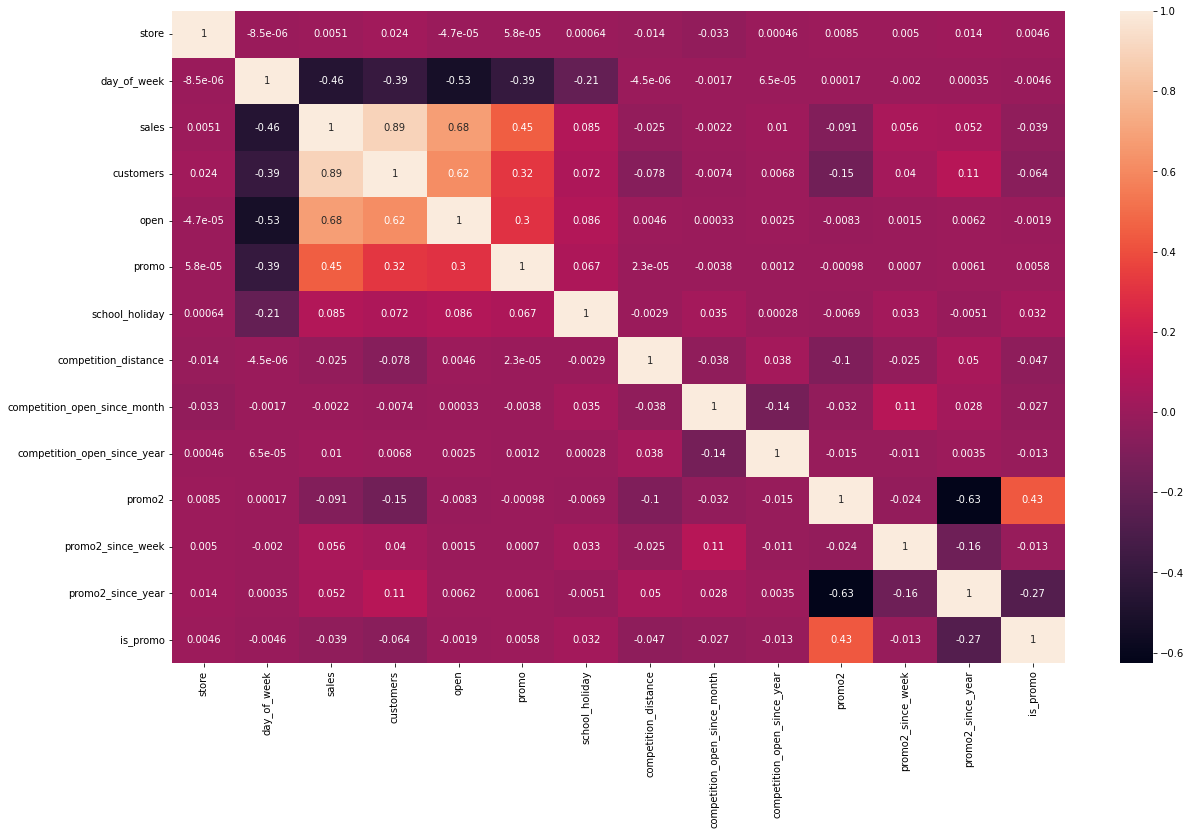

In [56]:
correlation = num_attributes.corr( method = 'pearson' )
sns.heatmap( correlation, annot = True ).figure.set_size_inches(20,12);

# Matriz Correlação  Variáveis Categóricas

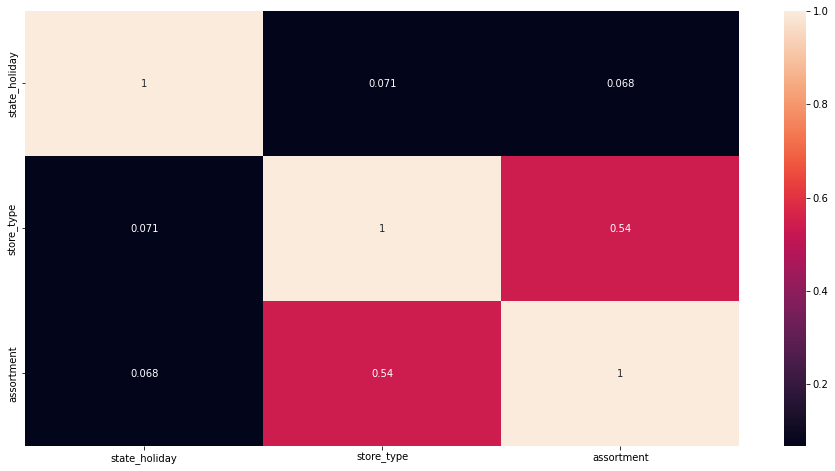

In [57]:
#only categorical_data
a= df4.select_dtypes( include='object' )


#Calculate Cramer V
a1 = cramer_v( a['state_holiday'], a['state_holiday'] )
a2 = cramer_v( a['state_holiday'], a['store_type'] )
a3 = cramer_v( a['state_holiday'], a['assortment'] )


a4 = cramer_v( a['store_type'], a['state_holiday'] )
a5 = cramer_v( a['store_type'], a['store_type'] )
a6 = cramer_v( a['store_type'], a['assortment'] )


a7 = cramer_v( a['assortment'], a['state_holiday'] )
a8 = cramer_v( a['assortment'], a['store_type'] )
a9 = cramer_v( a['assortment'], a['assortment'] )

#Final dataset
d = pd.DataFrame( {'state_holiday': [a1, a2, a3], 
               'store_type': [a4, a5, a6], 
               'assortment': [a7, a8, a9] })
d = d.set_index( d.columns )

#Plot heatmap correlaction:
sns.heatmap( d, annot=True ).figure.set_size_inches(16,8);

# MACHINE LEARNING MODELLING

# Compare Model's Performance

In [89]:
modelling_result_cv

,Model Name,MAE CV,MAP CV,RSE CV
0,Linear Regression,2081.73+/-295.63,0.3+/-0.02,2952.52+/-468.37
0,Lasso,2116.38+/-341.5,0.29+/-0.01,3057.75+/-504.26
0,Random Forest Regressor,858.0+/-224.87,0.12+/-0.02,1286.35+/-329.7
0,XGBoost Regressor,1048.45+/-172.04,0.14+/-0.02,1513.27+/-234.33


# <font color='blue'> 4. Conclusão & Demonstração </font>

# TRADUÇÃO E INTERPRETACAO DO ERRO

# Business Performance

In [9]:
#As lojas onde a predição teve maiores MAPE.
df92.sort_values( 'MAPE', ascending = False).head()

,store,predictions,worst_scenario,best_scenario,MAE,MAPE
291,292,105213.4384,101904.131842,101904.131842,3309.306558,0.567223
908,909,236345.2292,228686.407209,228686.407209,7658.821991,0.513971
594,595,371568.5920,367307.932324,367307.932324,4260.659676,0.297058
875,876,200504.2259,196634.185617,196634.185617,3870.040283,0.291588
721,722,351693.6467,349736.953546,349736.953546,1956.693154,0.261596


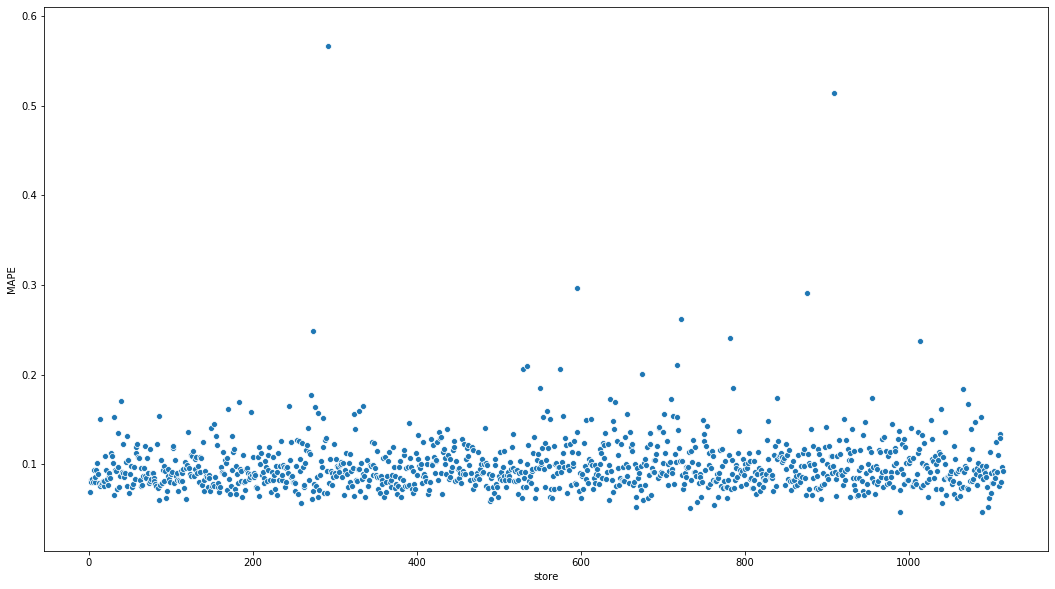

In [14]:
sns.scatterplot( x='store', y='MAPE', data = df92).figure.set_size_inches(18,10);

# Total Performance

In [18]:
df93 = df92[ [ 'predictions', 'worst_scenario', 'best_scenario' ] ].apply( lambda x: np.sum( x ), axis = 0 ).reset_index().rename( columns={'index' : 'scenario', 0: 'Values'} )
df93['Values'] = df93['Values'].map( 'R${:,.2f}'.format )
df93

,scenario,Values
0,predictions,"R$286,922,284.07"
1,worst_scenario,"R$286,176,353.50"
2,best_scenario,"R$286,176,353.50"


# Machine Learning Performance

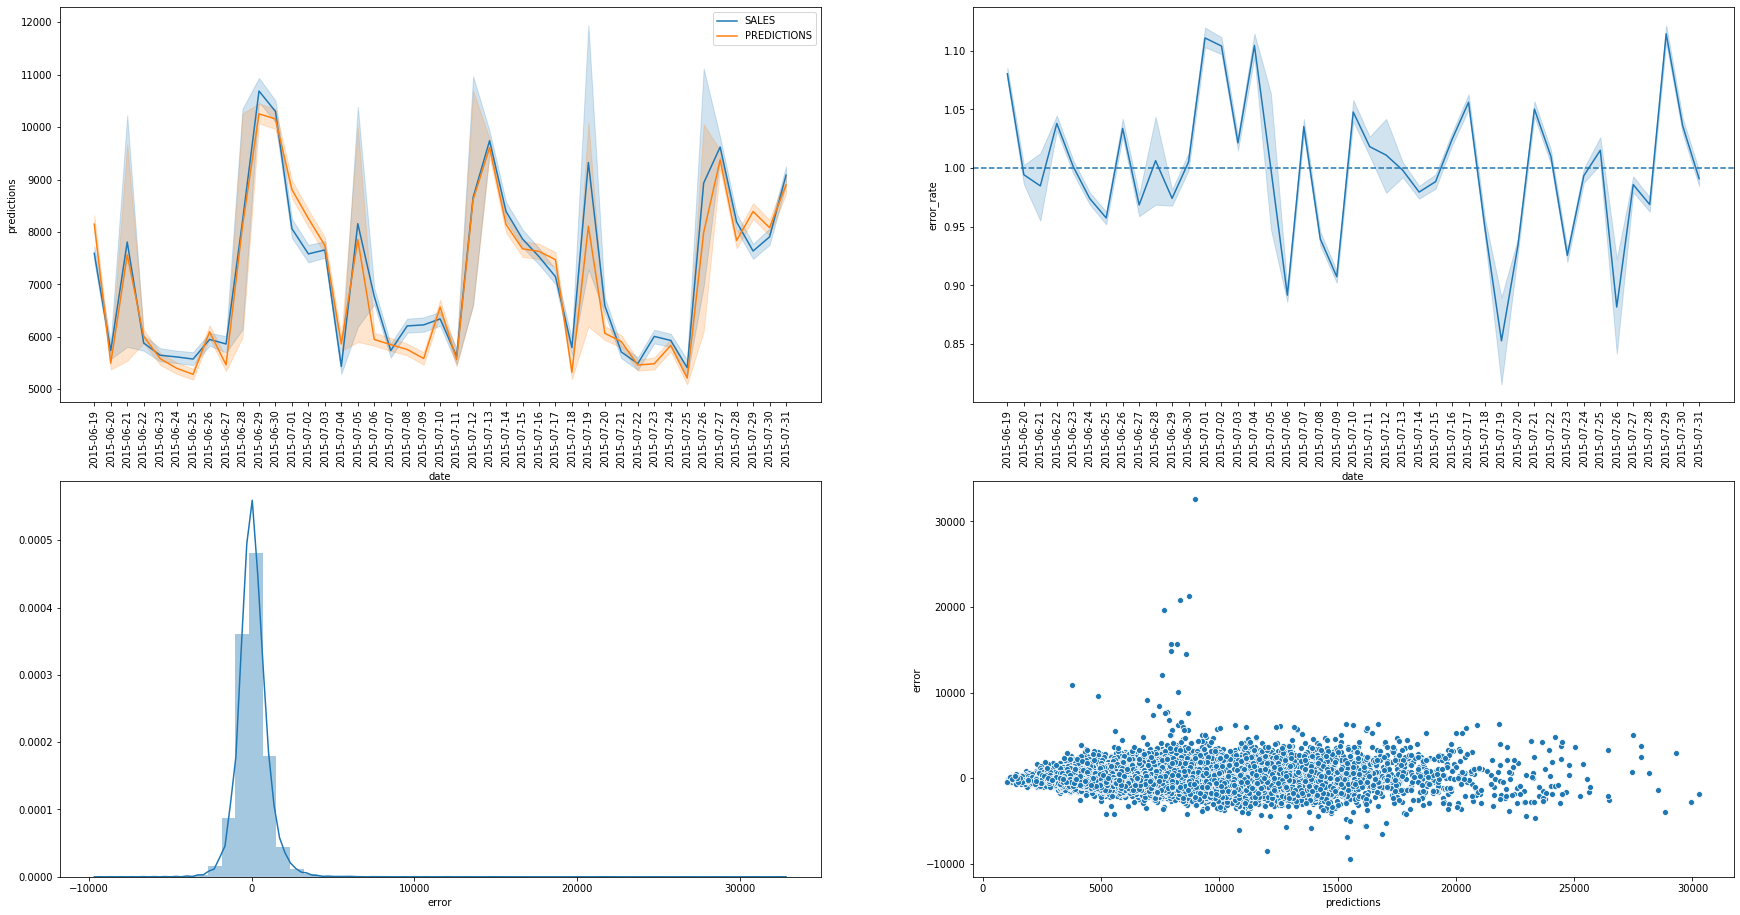

In [46]:
plt.subplot( 2,2,1).figure.set_size_inches(30, 16);
sns.lineplot( x='date', y='sales', data=df9_csv, label = 'SALES' );
sns.lineplot( x='date', y='predictions',  data = df9_csv, label = 'PREDICTIONS' );
plt.xticks( rotation = 90 );

plt.subplot( 2,2,2);
sns.lineplot( x='date', y='error_rate', data=df9_csv );
plt.axhline( 1, linestyle = '--');
plt.xticks( rotation = 90 );

plt.subplot( 2,2,3 );
sns.distplot( df9_csv['error'] );

plt.subplot( 2,2,4 );
sns.scatterplot( df9_csv['predictions'], df9_csv['error'] );

# <font color='blue'> 5. Próximos Passos </font>

- Workshop do Modelo para os Business Users
- Coletar Feedbacks sobre a Usabilidade
- Aumentar em 10% a Acurácia do Modelo

# <font color='blue'> PERGUNTAS??? </font>

# <font color='blue'> Muito Obrigado! </font>